In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sklearn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression

In [3]:
df=load_boston()
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
df.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
ds=pd.DataFrame(data=df.data,columns=df.feature_names)
ds

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
ds['target']=df.target
ds

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [8]:
ds.shape

(506, 14)

In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# SUMMARY OF STATISTIC

In [10]:
ds.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# TO CHECK CORRELATION

In [11]:
ds_cor=ds.corr()

<AxesSubplot:>

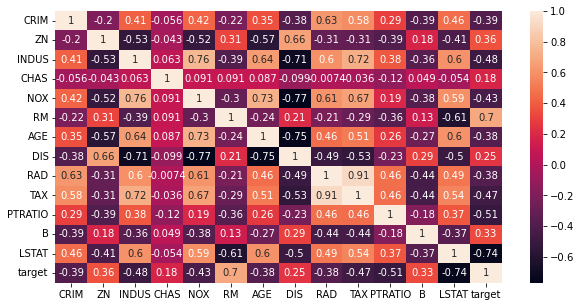

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(ds_cor,annot=True)

# UNIVARIENT ANALYSIS

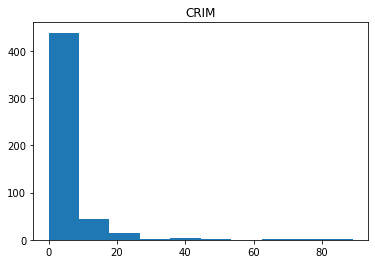

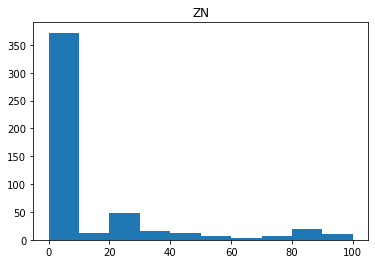

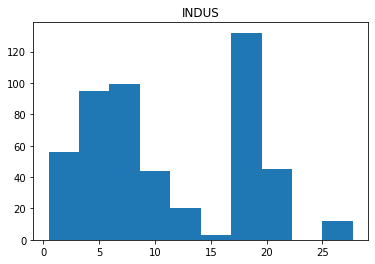

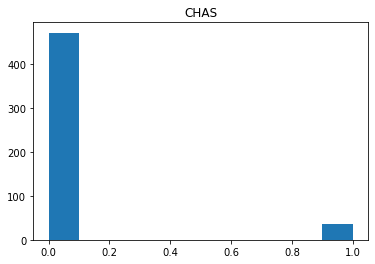

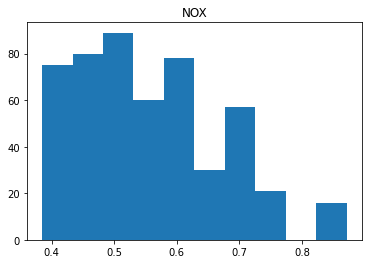

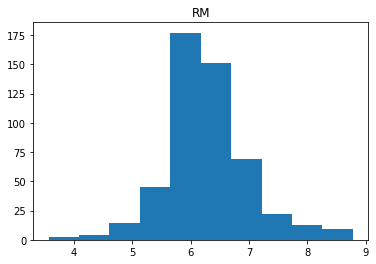

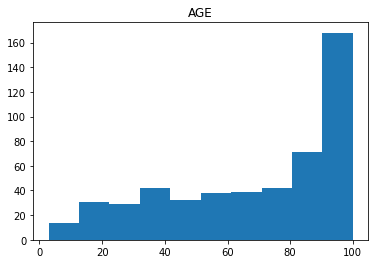

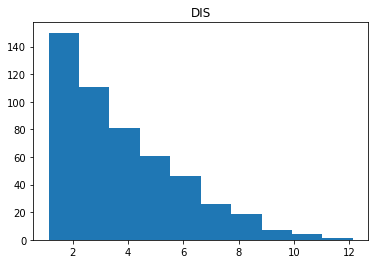

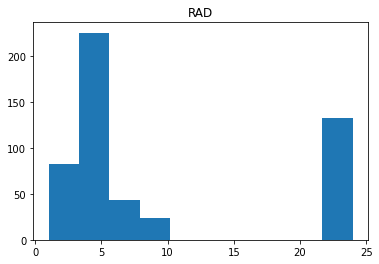

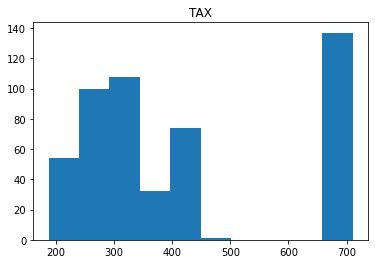

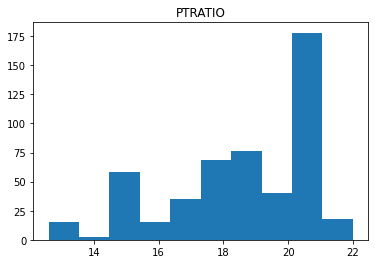

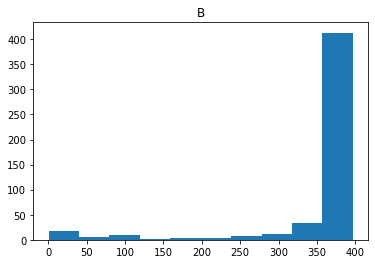

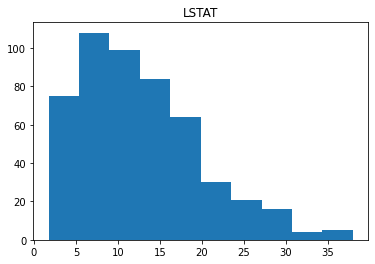

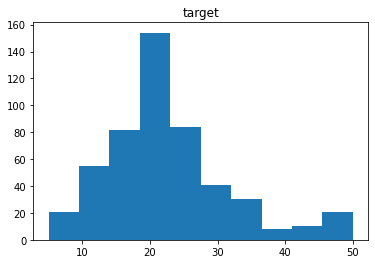

In [13]:
for i in ds.columns:
    plt.figure()
    plt.title(i)
    plt.hist(ds[i])

CRIM           AxesSubplot(0.125,0.71587;0.168478x0.16413)
ZN          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
INDUS       AxesSubplot(0.529348,0.71587;0.168478x0.16413)
CHAS        AxesSubplot(0.731522,0.71587;0.168478x0.16413)
NOX           AxesSubplot(0.125,0.518913;0.168478x0.16413)
RM         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
AGE        AxesSubplot(0.529348,0.518913;0.168478x0.16413)
DIS        AxesSubplot(0.731522,0.518913;0.168478x0.16413)
RAD           AxesSubplot(0.125,0.321957;0.168478x0.16413)
TAX        AxesSubplot(0.327174,0.321957;0.168478x0.16413)
PTRATIO    AxesSubplot(0.529348,0.321957;0.168478x0.16413)
B          AxesSubplot(0.731522,0.321957;0.168478x0.16413)
LSTAT            AxesSubplot(0.125,0.125;0.168478x0.16413)
target        AxesSubplot(0.327174,0.125;0.168478x0.16413)
dtype: object

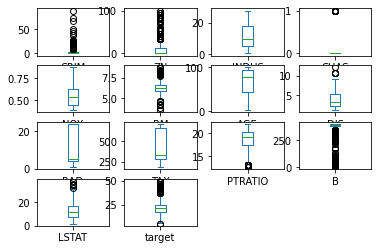

In [14]:
ds.plot(kind='box',subplots=True,layout=(4,4))

# BIVARIENT ANALYSIS

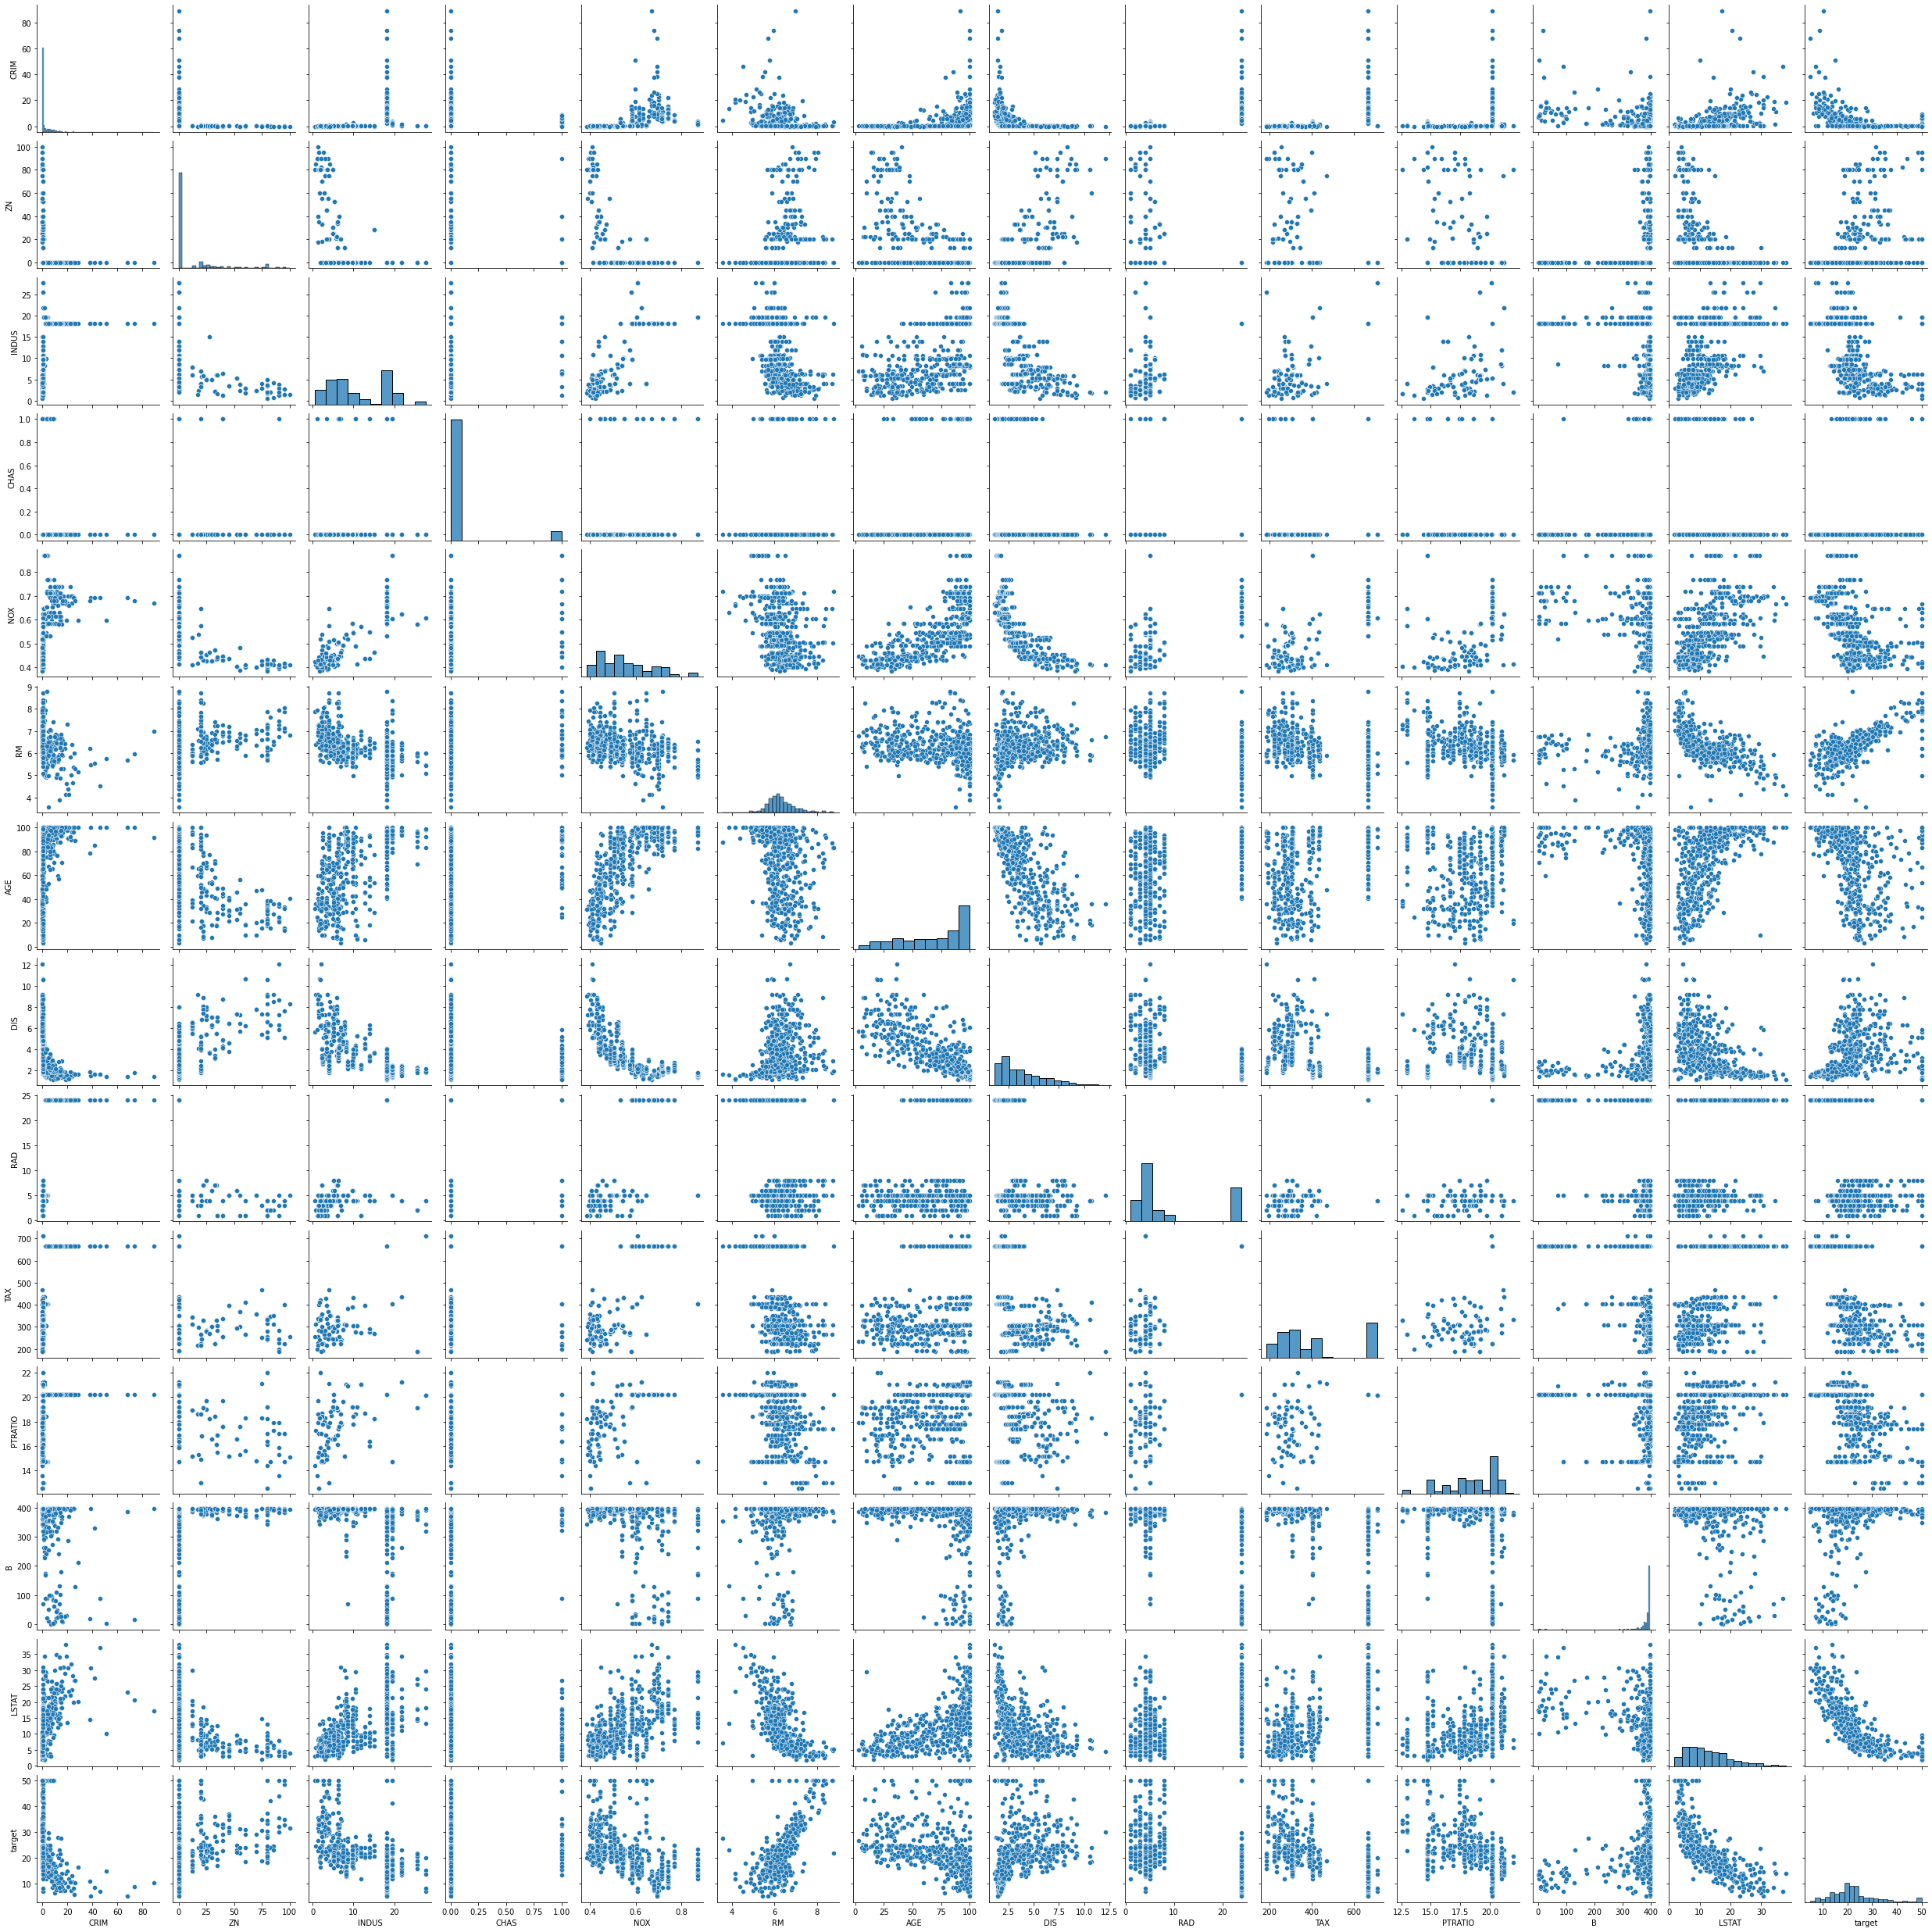

In [15]:
sns.pairplot(ds)

In [16]:
a=ds.drop(['target'],axis=1)

In [17]:
b=ds['target']
b

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, Length: 506, dtype: float64

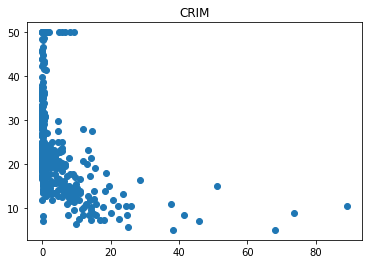

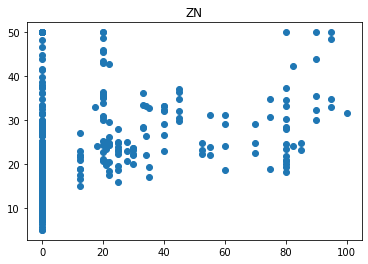

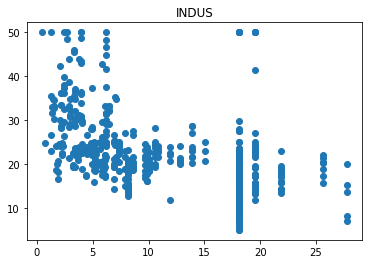

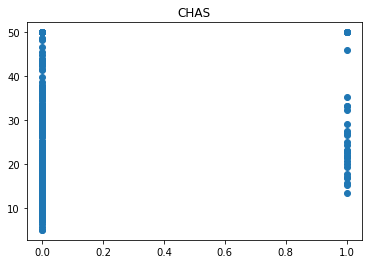

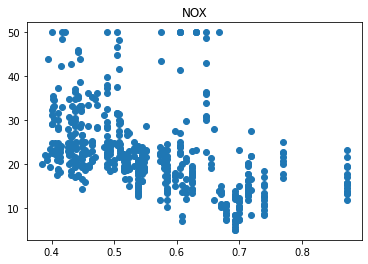

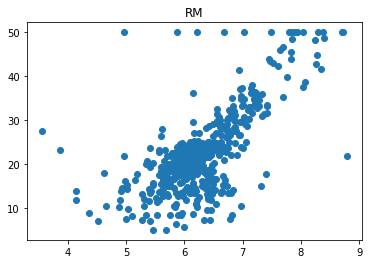

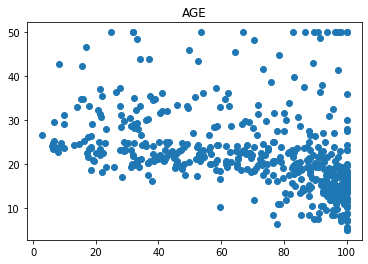

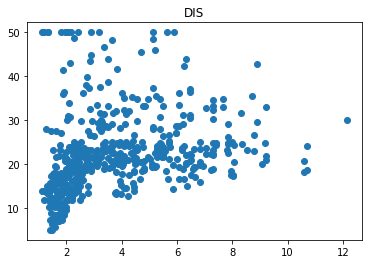

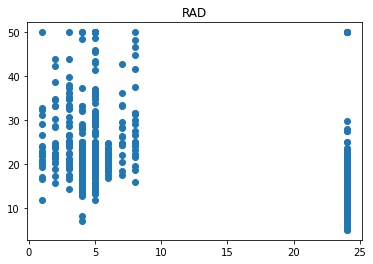

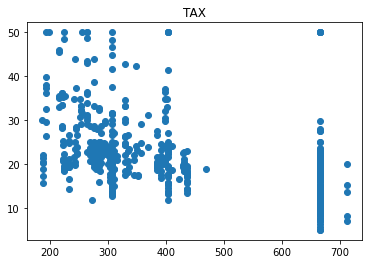

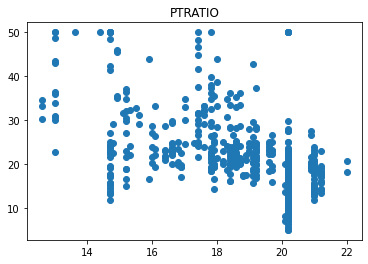

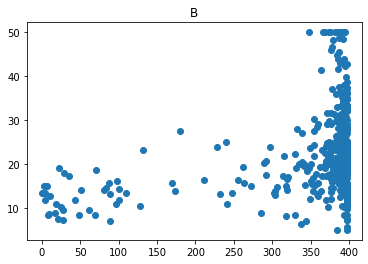

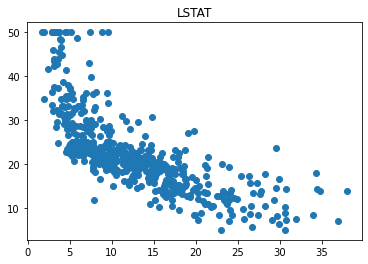

In [18]:
for i in a.columns:
    plt.figure()
    plt.title(i)
    plt.scatter(x=ds[i],y=ds['target'])

In [19]:
ds.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
target     1.108098
dtype: float64

# REMOVING SKEWNESS

In [20]:
from scipy.stats import boxcox     #ds.CRIM=np.log(ds['CRIM'])
ds.AGE=boxcox(ds['AGE'],0)


<AxesSubplot:ylabel='Frequency'>

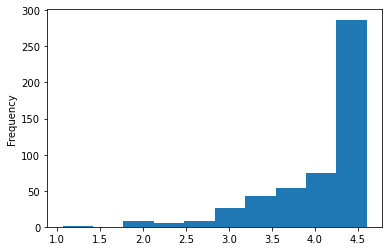

In [21]:
ds['AGE'].plot.hist()

In [22]:
ds.RAD=boxcox(ds['RAD'],0)


<AxesSubplot:ylabel='Frequency'>

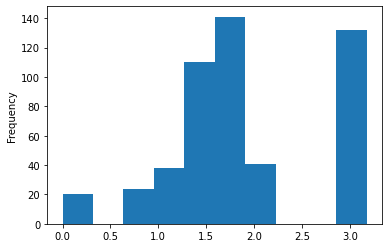

In [23]:
ds['RAD'].plot.hist()

# REMOVING OUTLIERS

In [24]:
from scipy.stats import zscore
z=np.abs(zscore(ds))

In [25]:
threshold=3
print(np.where(z>3))

(array([ 41,  42,  43,  55,  56,  57,  70,  72,  73,  74, 102, 141, 142,
       152, 154, 155, 160, 162, 163, 199, 200, 201, 202, 203, 204, 208,
       209, 210, 211, 212, 216, 218, 219, 220, 221, 222, 225, 234, 236,
       243, 251, 252, 253, 256, 257, 262, 269, 273, 274, 276, 277, 282,
       283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356, 357, 358,
       363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374, 380, 398,
       404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415, 416, 418,
       418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436, 437, 438,
       445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 6,  6,  6,  1,  1,  1,  6,  6,  6,  6, 11, 12,  3,  3,  3,  3,  3,
        3,  3,  1,  1,  1,  1,  1,  1,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  5,  3,  3,  6,  6,  6,  6,  1,  5,  5,  3,  3,  3,  3,  3,
        3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,  3,  3,  3,  3,  3,  5,
        5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,  0,  5,  0, 11,

In [26]:
ds.drop('LSTAT',axis=1,inplace=True)

In [27]:
dc=ds[(z<3).all(axis=1)]
dc

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,4.177459,4.0900,0.000000,296.0,15.3,396.90,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,4.368181,4.9671,0.693147,242.0,17.8,396.90,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,4.112512,4.9671,0.693147,242.0,17.8,392.83,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,3.824284,6.0622,1.098612,222.0,18.7,394.63,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,3.992681,6.0622,1.098612,222.0,18.7,396.90,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,4.235555,2.4786,0.000000,273.0,21.0,391.99,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,4.339902,2.2875,0.000000,273.0,21.0,396.90,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,4.510860,2.1675,0.000000,273.0,21.0,396.90,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,4.492001,2.3889,0.000000,273.0,21.0,393.45,22.0


In [28]:
ds.shape

(506, 13)

In [29]:
dc.shape   #REMOVING OUTLIERS

(404, 13)

In [30]:
x=a
y=b

# TRAIN_TEST_SPLIT_DATA

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [32]:
x_train.shape

(339, 13)

In [33]:
y_train.shape

(339,)

In [34]:
x_test.shape

(167, 13)

In [35]:
y_test.shape

(167,)

In [36]:
lg=LinearRegression()

In [37]:
lg.fit(x_train,y_train)

LinearRegression()

In [38]:
lg.coef_

array([-1.28749718e-01,  3.78232228e-02,  5.82109233e-02,  3.23866812e+00,
       -1.61698120e+01,  3.90205116e+00, -1.28507825e-02, -1.42222430e+00,
        2.34853915e-01, -8.21331947e-03, -9.28722459e-01,  1.17695921e-02,
       -5.47566338e-01])

In [39]:
lg.intercept_

33.334975755636066

In [40]:
lg.score(x_train,y_train)    #cheking the ranom_state value data score(accuracy)

0.7392344370995027

In [41]:
#predicted value
pred=lg.predict(x_test)
print('Predicted_result_price-->',pred)
print('Actual_prediced_price-->',y_test)

Predicted_result_price--> [28.53469469 36.6187006  15.63751079 25.5014496  18.7096734  23.16471591
 17.31011035 14.07736367 23.01064388 20.54223482 24.91632351 18.41098052
 -6.52079687 21.83372604 19.14903064 26.0587322  20.30232625  5.74943567
 40.33137811 17.45791446 27.47486665 30.2170757  10.80555625 23.87721728
 17.99492211 16.02608791 23.268288   14.36825207 22.38116971 19.3092068
 22.17284576 25.05925441 25.13780726 18.46730198 16.60405712 17.46564046
 30.71367733 20.05106788 23.9897768  24.94322408 13.97945355 31.64706967
 42.48057206 17.70042814 26.92507869 17.15897719 13.68918087 26.14924245
 20.2782306  29.99003492 21.21260347 34.03649185 15.41837553 25.95781061
 39.13897274 22.96118424 18.80310558 33.07865362 24.74384155 12.83640958
 22.41963398 30.64804979 31.59567111 16.34088197 20.9504304  16.70145875
 20.23215646 26.1437865  31.12160889 11.89762768 20.45432404 27.48356359
 10.89034224 16.77707214 24.02593714  5.44691807 21.35152331 41.27267175
 18.13447647  9.8012101  2

In [42]:
print("Mean_Absolue_Error-->",mean_absolute_error(y_test,pred))
print("Mean_Squared_Error-->",mean_squared_error(y_test,pred))
print("Root_Mean_Squared_Error-->",np.sqrt(mean_squared_error(y_test,pred)))
print("R2_Square-->",r2_score(y_test,pred))

Mean_Absolue_Error--> 3.148255754816812
Mean_Squared_Error--> 20.72402343733963
Root_Mean_Squared_Error--> 4.552364598463048
R2_Square--> 0.7261570836552493


In [43]:
#predict the house price by providing the values
t=np.array([0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,0.80])
t

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       8.000e-01])

In [44]:
t.shape

(13,)

In [45]:
t=t.reshape(1,-1)

In [46]:
t.shape

(1, 13)

In [47]:
lg.predict(t)

array([32.27886221])

In [48]:
BOS=pd.DataFrame(pred)
BOS.to_csv('BOS_HOUSE.CSV')

# FINAL